In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

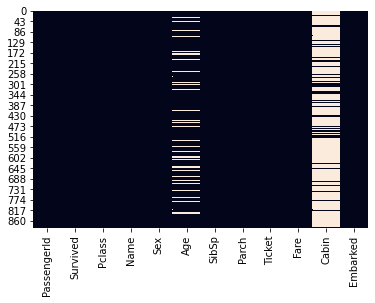

In [6]:
import seaborn as sns

sns.heatmap(train.isnull(), cbar=False)

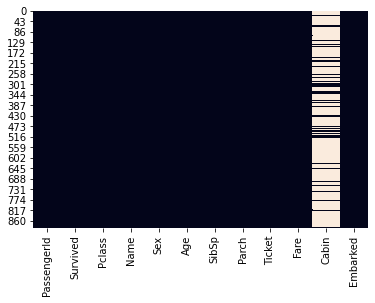

In [7]:
train['Age'] = train['Age'].fillna(train['Age'].median())


# vamos a revisar si los valores nulos
sns.heatmap(train.isnull(), cbar=False)

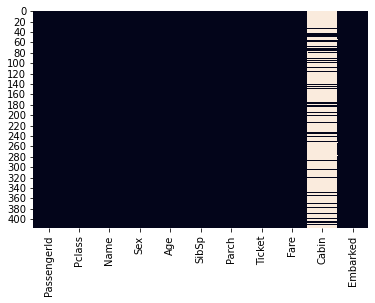

In [8]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

sns.heatmap(test.isnull(), cbar=False)

In [9]:
corr = train.corr()
corr.style.background_gradient(cmap='plasma').set_precision(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.06,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.34,0.08,0.02,-0.55
Age,0.03,-0.06,-0.34,1.00,-0.23,-0.17,0.10
SibSp,-0.06,-0.04,0.08,-0.23,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.17,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


In [10]:
train = train.drop('Name',axis = 1)
train = train.drop('Sex',axis = 1)
train = train.drop('Ticket',axis = 1)
train = train.drop('Cabin',axis = 1)


test = test.drop('Name',axis = 1)
test = test.drop('Sex',axis = 1)
test = test.drop('Ticket',axis = 1)
test = test.drop('Cabin',axis = 1)

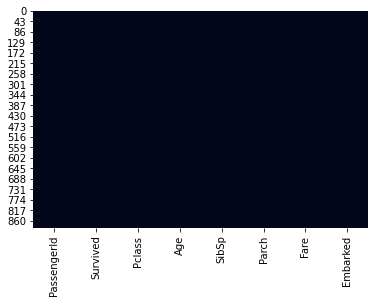

In [11]:
sns.heatmap(train.isnull(), cbar=False)

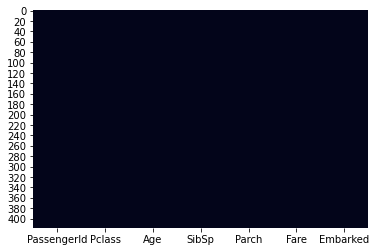

In [12]:
sns.heatmap(test.isnull(), cbar=False)

In [13]:
for i in [train, test]:
    i['Embarked'] = i['Embarked'].fillna('S')

In [14]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')


enc_df = pd.DataFrame(enc.fit_transform(train[['Embarked']]).toarray())
train = train.join(enc_df)

enc_df = pd.DataFrame(enc.fit_transform(test[['Embarked']]).toarray())
test = test.join(enc_df)


train = train.drop('Embarked',axis = 1)
test = test.drop('Embarked',axis = 1)

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,0,1,2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [16]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
0              float64
1              float64
2              float64
dtype: object

In [17]:
X = np.array(train.iloc[:,train.columns != 'Survived'])
y = np.array(train.Survived).reshape(-1,1)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix


rfc = RandomForestClassifier().fit(X, y.reshape(-1))
y_prima = rfc.predict(X)


In [19]:
print('Cross_val Score RandomForestClassifier = ', cross_val_score(rfc, X, y.reshape(-1), cv=5).mean())

Cross_val Score RandomForestClassifier =  0.694771200803465


In [20]:
class_names = ["Survived", "Dead"]

print(classification_report(y, y_prima, target_names=class_names))

              precision    recall  f1-score   support

    Survived       1.00      1.00      1.00       549
        Dead       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



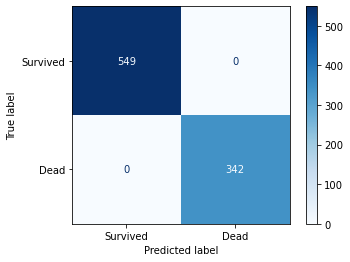

In [21]:
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(rfc, X, y,
                         display_labels=class_names,
                         cmap=plt.cm.Blues,
                         normalize=None)
plt.show()

In [22]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,0,1,2
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0
3,895,3,27.0,0,0,8.6625,0.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0.0,0.0,1.0
414,1306,1,39.0,0,0,108.9000,1.0,0.0,0.0
415,1307,3,38.5,0,0,7.2500,0.0,0.0,1.0
416,1308,3,27.0,0,0,8.0500,0.0,0.0,1.0


In [23]:

predictions = rfc.predict(test.iloc[:,test.columns != 'Survived'])



In [24]:
print(test)

     PassengerId  Pclass   Age  SibSp  Parch      Fare    0    1    2
0            892       3  34.5      0      0    7.8292  0.0  1.0  0.0
1            893       3  47.0      1      0    7.0000  0.0  0.0  1.0
2            894       2  62.0      0      0    9.6875  0.0  1.0  0.0
3            895       3  27.0      0      0    8.6625  0.0  0.0  1.0
4            896       3  22.0      1      1   12.2875  0.0  0.0  1.0
..           ...     ...   ...    ...    ...       ...  ...  ...  ...
413         1305       3  27.0      0      0    8.0500  0.0  0.0  1.0
414         1306       1  39.0      0      0  108.9000  1.0  0.0  0.0
415         1307       3  38.5      0      0    7.2500  0.0  0.0  1.0
416         1308       3  27.0      0      0    8.0500  0.0  0.0  1.0
417         1309       3  27.0      1      1   22.3583  1.0  0.0  0.0

[418 rows x 9 columns]


In [25]:
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('/kaggle/input/titanic/test.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('submission1.csv', sep=",", index = False)

print('end')

end
